<h2>前馈神经网络/多层感知机</h2>

<p>基础公式:&nbsp;</p>
<p>$$ z = \mathbf{w}\mathbf{x} +b $$</p>
<p>$$ a = f(z) $$</p>
<p>其中\( \mathbf{w} \)和\( \mathbf{x} \)都是向量, \( f(&middot;) \)则是激活函数</p>

<p>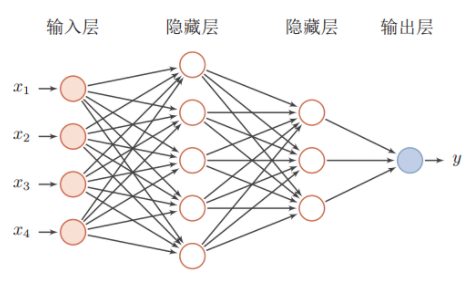</p>

<p>模型的参数问题：</p>
<p>如下所示，构造一个简单的三层前馈神经网络，输入数据为二维坐标的话，如果第一层神经元个数为6</p>
<p>那么对于每个神经元来说，它的权重\( w \)&nbsp;的个数为2，</p>
<p>对于下一层来说，它的权重则根据上层，单个神经元的权重 \( w \) 个数为6</p>
<p>&nbsp;</p>

In [2]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [6]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fn1 = nn.Linear(2, 6)
        self.relu1 = nn.ReLU()

        self.fn2 = nn.Linear(6, 3)
        self.relu2 = nn.ReLU()
        
        self.fn3 = nn.Linear(3, 1)


    def forward(self, x):
        x1 = self.relu1(self.fn1(x))
        x2 = self.relu2(self.fn2(x1))
        
        return self.fn3(x2)

model = SimpleNN()

for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

random_tensor = torch.rand([6,2])
random_tensor

<h2>单步梯度计算公式验证</h2>
<ol>
<li>计算包含一个隐藏层，一个神经元的前馈神经网络的梯度计算与参数优化过</li>
</ol>
<p>&nbsp;</p>

In [8]:
x = [2,4]
y = [4,16]
torch.manual_seed(0)
class OneUnitNN(nn.Module):
    def __init__(self):
        super(OneUnitNN, self).__init__()
        self.fn1 = nn.Linear(1, 1)
        self.relu1 = nn.ReLU()
        self.fn2 = nn.Linear(1, 1)
    def forward(self, x):
        x1 = self.relu1(self.fn1(x))
        return self.fn2(x1)
model = OneUnitNN()
# 查看权重weights
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])

fn1.weight 	 tensor([[-0.9443]])
fn1.bias 	 tensor([-0.6206])
fn2.weight 	 tensor([[-0.7917]])
fn2.bias 	 tensor([0.8422])


<p>上面构建的神经网络包含一个完整的神经元（包含激活函数）和一个线性输出单元（不包含激活函数）</p>
<p>下面进行梯度预计算（MSE作为loss）：</p>
<p>$$Loss = ( y - \hat{y})^{2} $$</p>
<p>由于输出为一维的点，所以省略加权符号。</p>
<p>对于线性输出单元：</p>
<p>如果：\( z= y-\hat{y} \)</p>
<p>那么：</p>
<p>$$ \frac{\partial L} {\partial w}=\frac{\partial L}{\partial z} \frac{\partial z}{\partial w}=2(y-\hat{y}) * (x) $$</p>
<p>$$ \frac{\partial L} {\partial b}=\frac{\partial L}{\partial z} \frac{\partial z}{\partial w}=2(y-\hat{y}) * (-1) $$</p>
<p>这里的x即是上一层的输出。</p>
<p>对于隐藏层的神经元来说, 假设隐藏层的神经元权重为\( w_{1} \)，偏置为\( b_{1} \), 线性单元为\( z_{1} \), 激活函数为\( g(*) \)</p>
<p>那么损失函数相对于隐藏层神经元的梯度应该为:</p>
<p>$$ \frac{\partial L} {\partial w_{1}}=\frac{\partial L}{\partial z} \frac{\partial z}{\partial g(*)} \frac{\partial g(*)}{\partial z_{1}} \frac{\partial z_{1}}{\partial w_{1}}=2(y-\hat{y}) *w*(0 or 1)*x $$</p>
<p>$$ \frac{\partial L} {\partial b_{1}}=\frac{\partial L}{\partial z} \frac{\partial z}{\partial g(*)} \frac{\partial g(*)}{\partial z_{1}} \frac{\partial z_{1}}{\partial b_{1}}=2(y-\hat{y}) *w*(0 or 1)*(-1) $$</p>
<p>其中(0 or 1)是relu函数的特性，如果\( z_{1} \)值小于0，则导数为0，否则为1.</p>
<p>&nbsp;</p>

<p>根据上式计算，在x=2, y = 4时，输出\( \hat{y} \)=0.8422</p>
<p>对\( w_{1} \)的梯度: \( 2*(4-0.8422)*(-0.7917)*0*2=0 \)</p>
<p>对\( b_{1} \)的梯度: \( 2*(4-0.8422)*(-0.7917)*0*2=0 \)</p>
<p>对\( w \)的梯度: \( 2*(4-0.8422)*0=0 \)</p>
<p>对\( b \)的梯度: \( 2*(4-0.8422)*(-1)=-6.31 \)</p>

In [17]:
# 定义损失函数
criterion = nn.MSELoss()
# 前向传播
output = model(torch.tensor([2.],))
# 计算损失
loss = criterion(output, torch.tensor([4.],))
# 反向传播
loss.backward()

In [18]:
# 遍历模型的所有参数，并打印梯度
for name, parameter in model.named_parameters():
    if parameter.requires_grad:
        print(name, parameter.grad)
# 经验证梯度计算正确

fn1.weight tensor([[0.]])
fn1.bias tensor([0.])
fn2.weight tensor([[0.]])
fn2.bias tensor([-6.3156])


<p>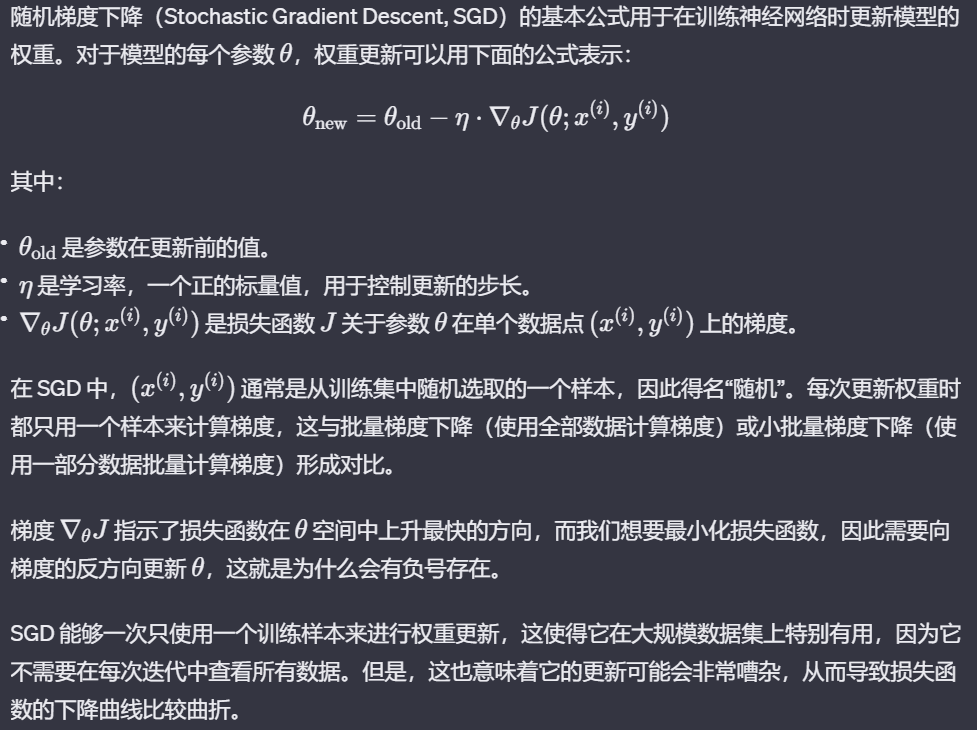</p>

<p>如果应用随机梯度下降，即针对当前数据点进行梯度更新，如果设置学习率为0.001，那么经过计算</p>
<p>对\( w_{1} \): 不改变</p>
<p>对\( b_{1} \): 不改变</p>
<p>对\( w \): 不改变</p>
<p>对\( b \): \( b_{new}=0.8422-(-6.31)*0.001= 0.84857 \)</p>

In [19]:
# 代码验证
optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer.step()

C:\Users\qsadmin\.conda\envs\PytorchNew\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# 查看权重weights
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])
# 验证正确

fn1.weight 	 tensor([[-0.9443]])
fn1.bias 	 tensor([-0.6206])
fn2.weight 	 tensor([[-0.7917]])
fn2.bias 	 tensor([0.8485])
